In [3]:
import scanpy as sc
import os
os.chdir('../')

In [50]:
# Manually combine some datasets
base_dir = '/home/xlv0877/proj_home/dl/data/test/1000/mixscale_2degs/'
data_dir = '/home/xlv0877/proj_home/dl/data/test/1000/'

In [37]:
import pandas as pd

meta = []
pattern = '_obs.csv'
for f in os.listdir(base_dir):
    if f.endswith(pattern):
        print(f'Adding {f} to meta')
        fa = os.path.join(base_dir, f)
        m = pd.read_csv(fa, index_col=0)
        m['dataset'] = f.split(pattern)[0]
        meta.append(m)
print('Combining data')
meta = pd.concat(meta)

Adding Mali_2024_processed_obs.csv to meta
Adding ReplogleWeissman2022_K562_gwps_obs.csv to meta
Adding ReplogleWeissman2022_K562_essential_obs.csv to meta
Adding ReplogleWeissman2022_rpe1_obs.csv to meta
Combining data


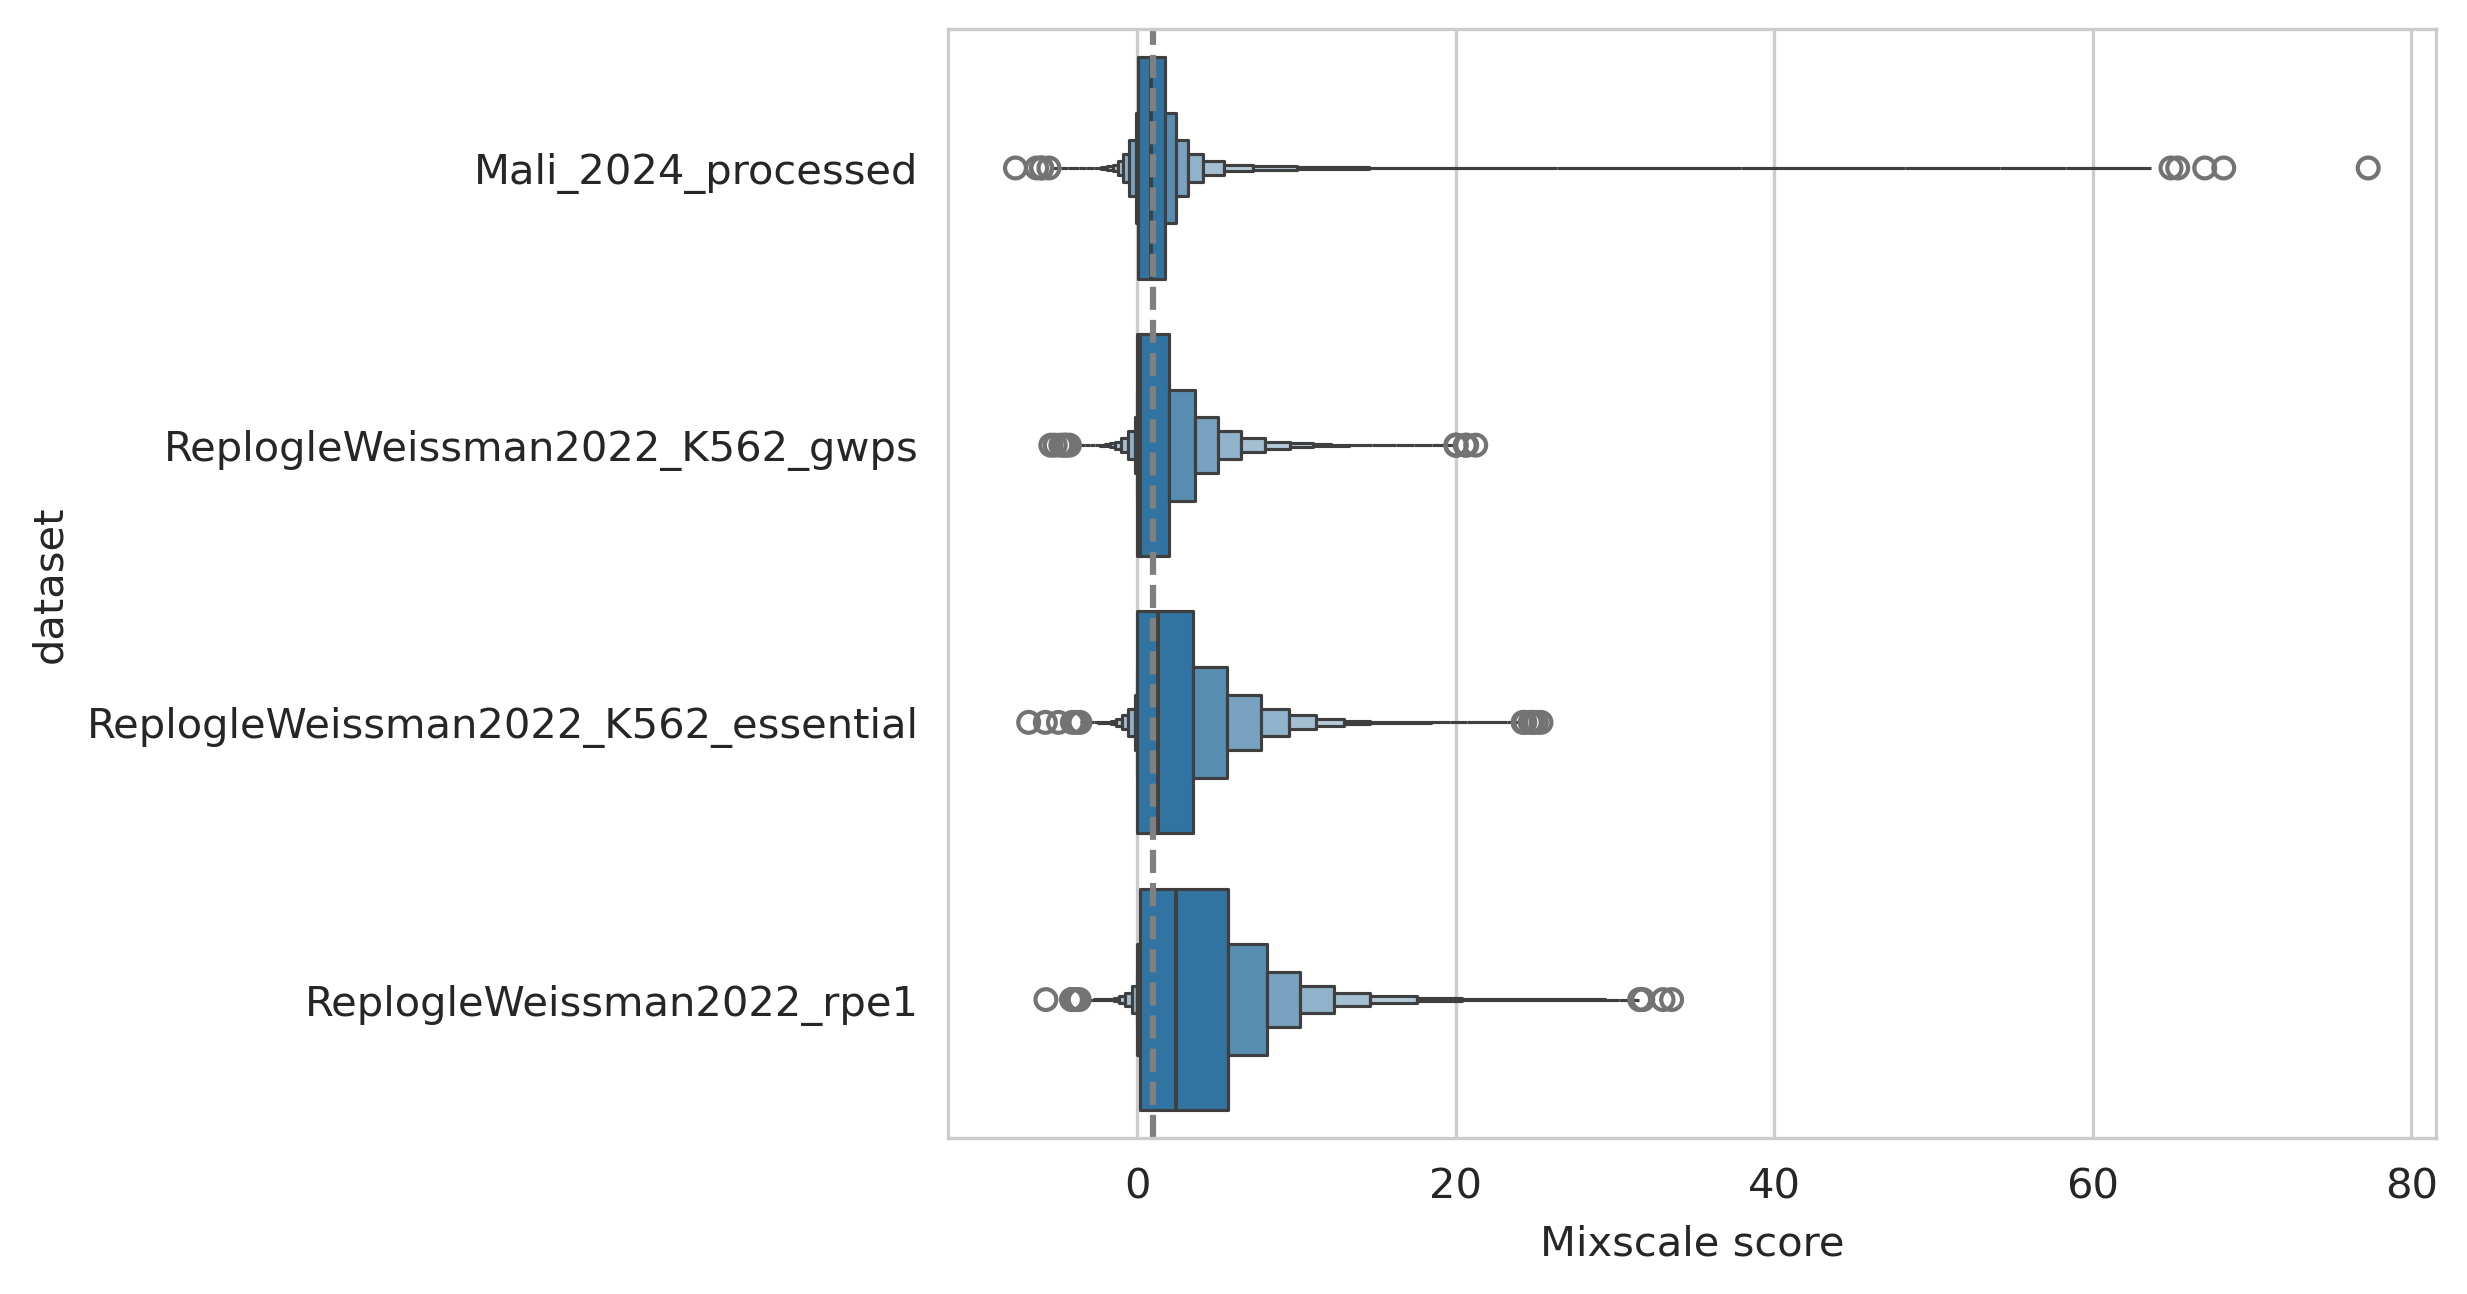

In [63]:
fig = plt.figure(dpi=300)
ax = sns.boxenplot(meta, x='mixscale_score', y='dataset')
plt.xlabel('Mixscale score')
# plt.axvline(threshold, linestyle='--', color='grey')
plt.show()

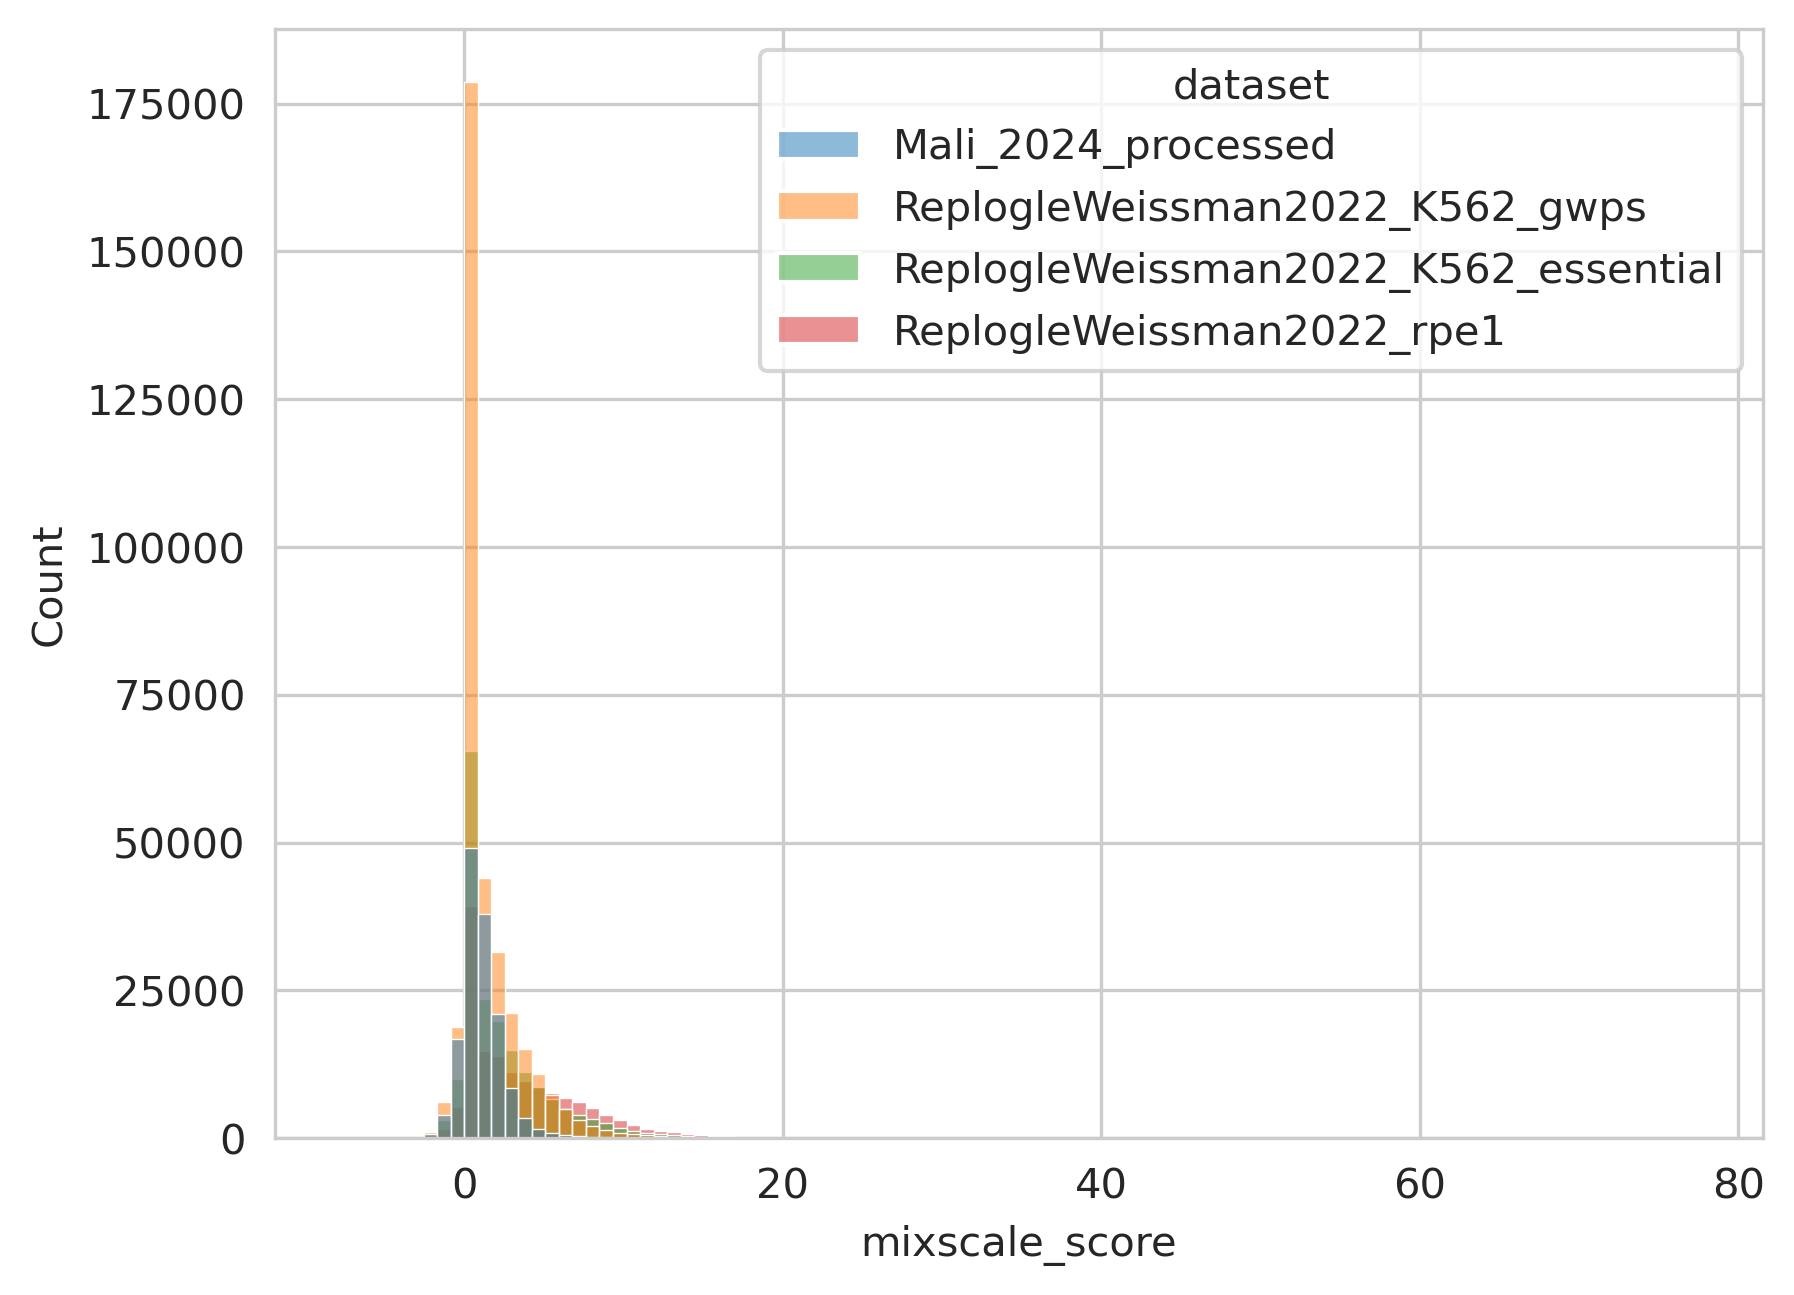

In [49]:
fig = plt.figure(dpi=300)
ax = sns.histplot(meta, bins=100, x='mixscale_score', hue='dataset')

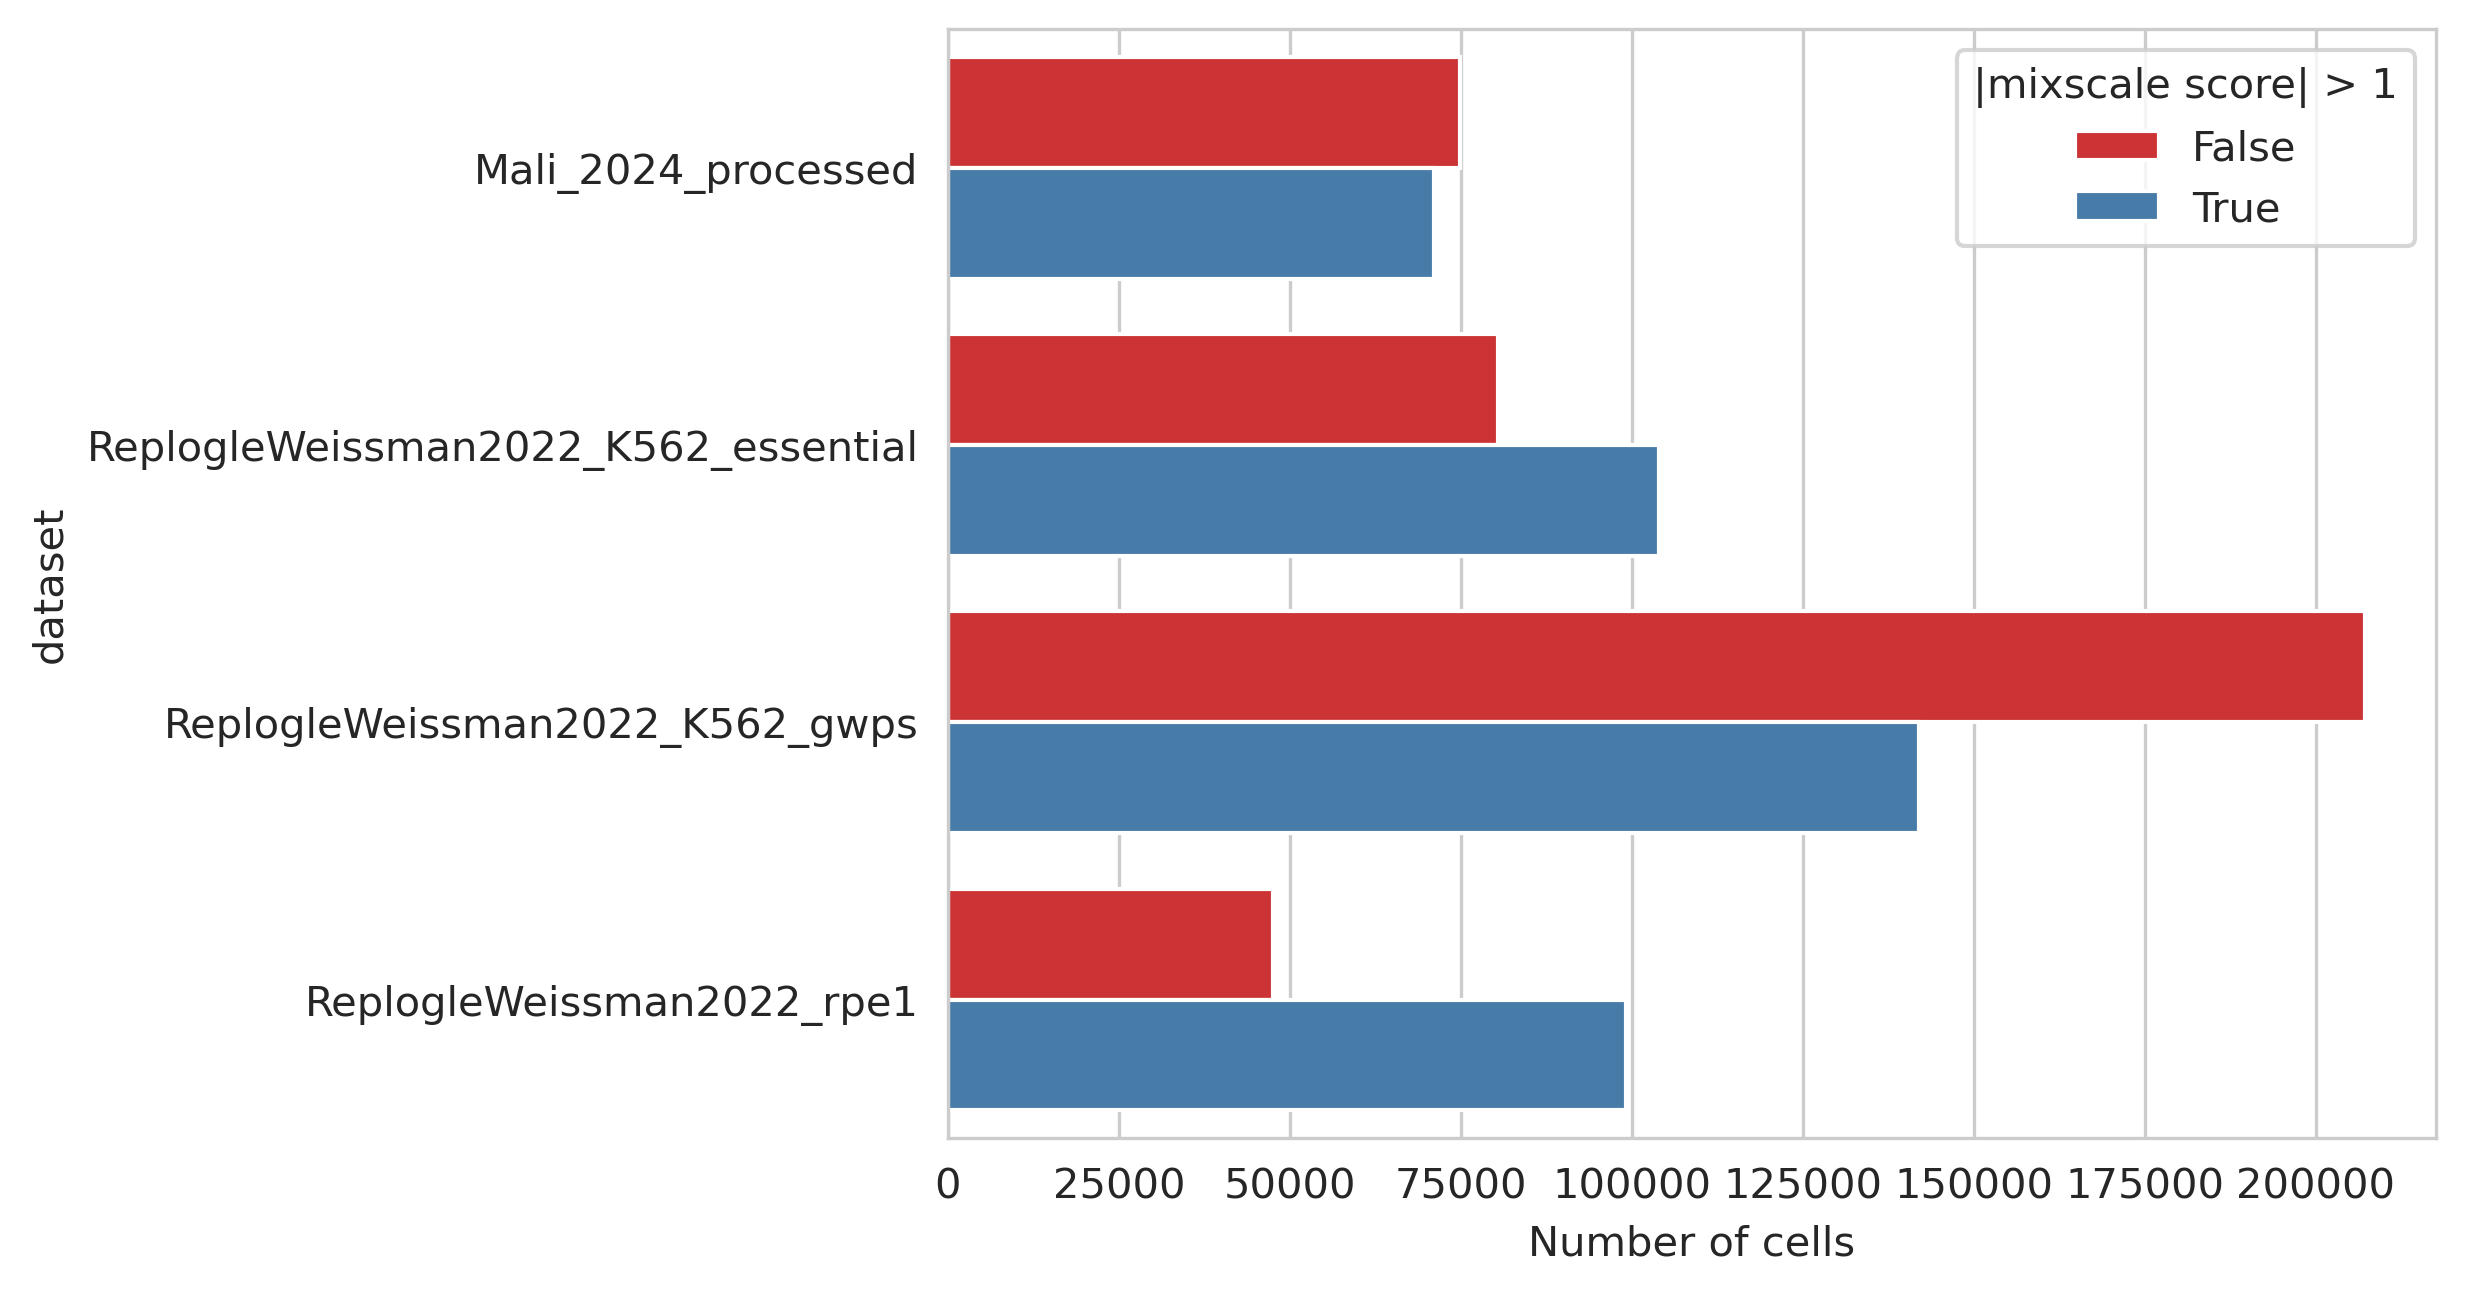

In [47]:
threshold = 1
meta['mixscale_threshold'] = meta['mixscale_score'].abs() > threshold
df = meta.groupby(['dataset'])['mixscale_threshold'].value_counts().reset_index()

fig = plt.figure(dpi=300)
ax = sns.barplot(df, y='dataset', x='count', hue='mixscale_threshold', dodge=True, palette='Set1', )
plt.xlabel('Number of cells')
plt.legend(title=f'|mixscale score| > {threshold}')
plt.show()

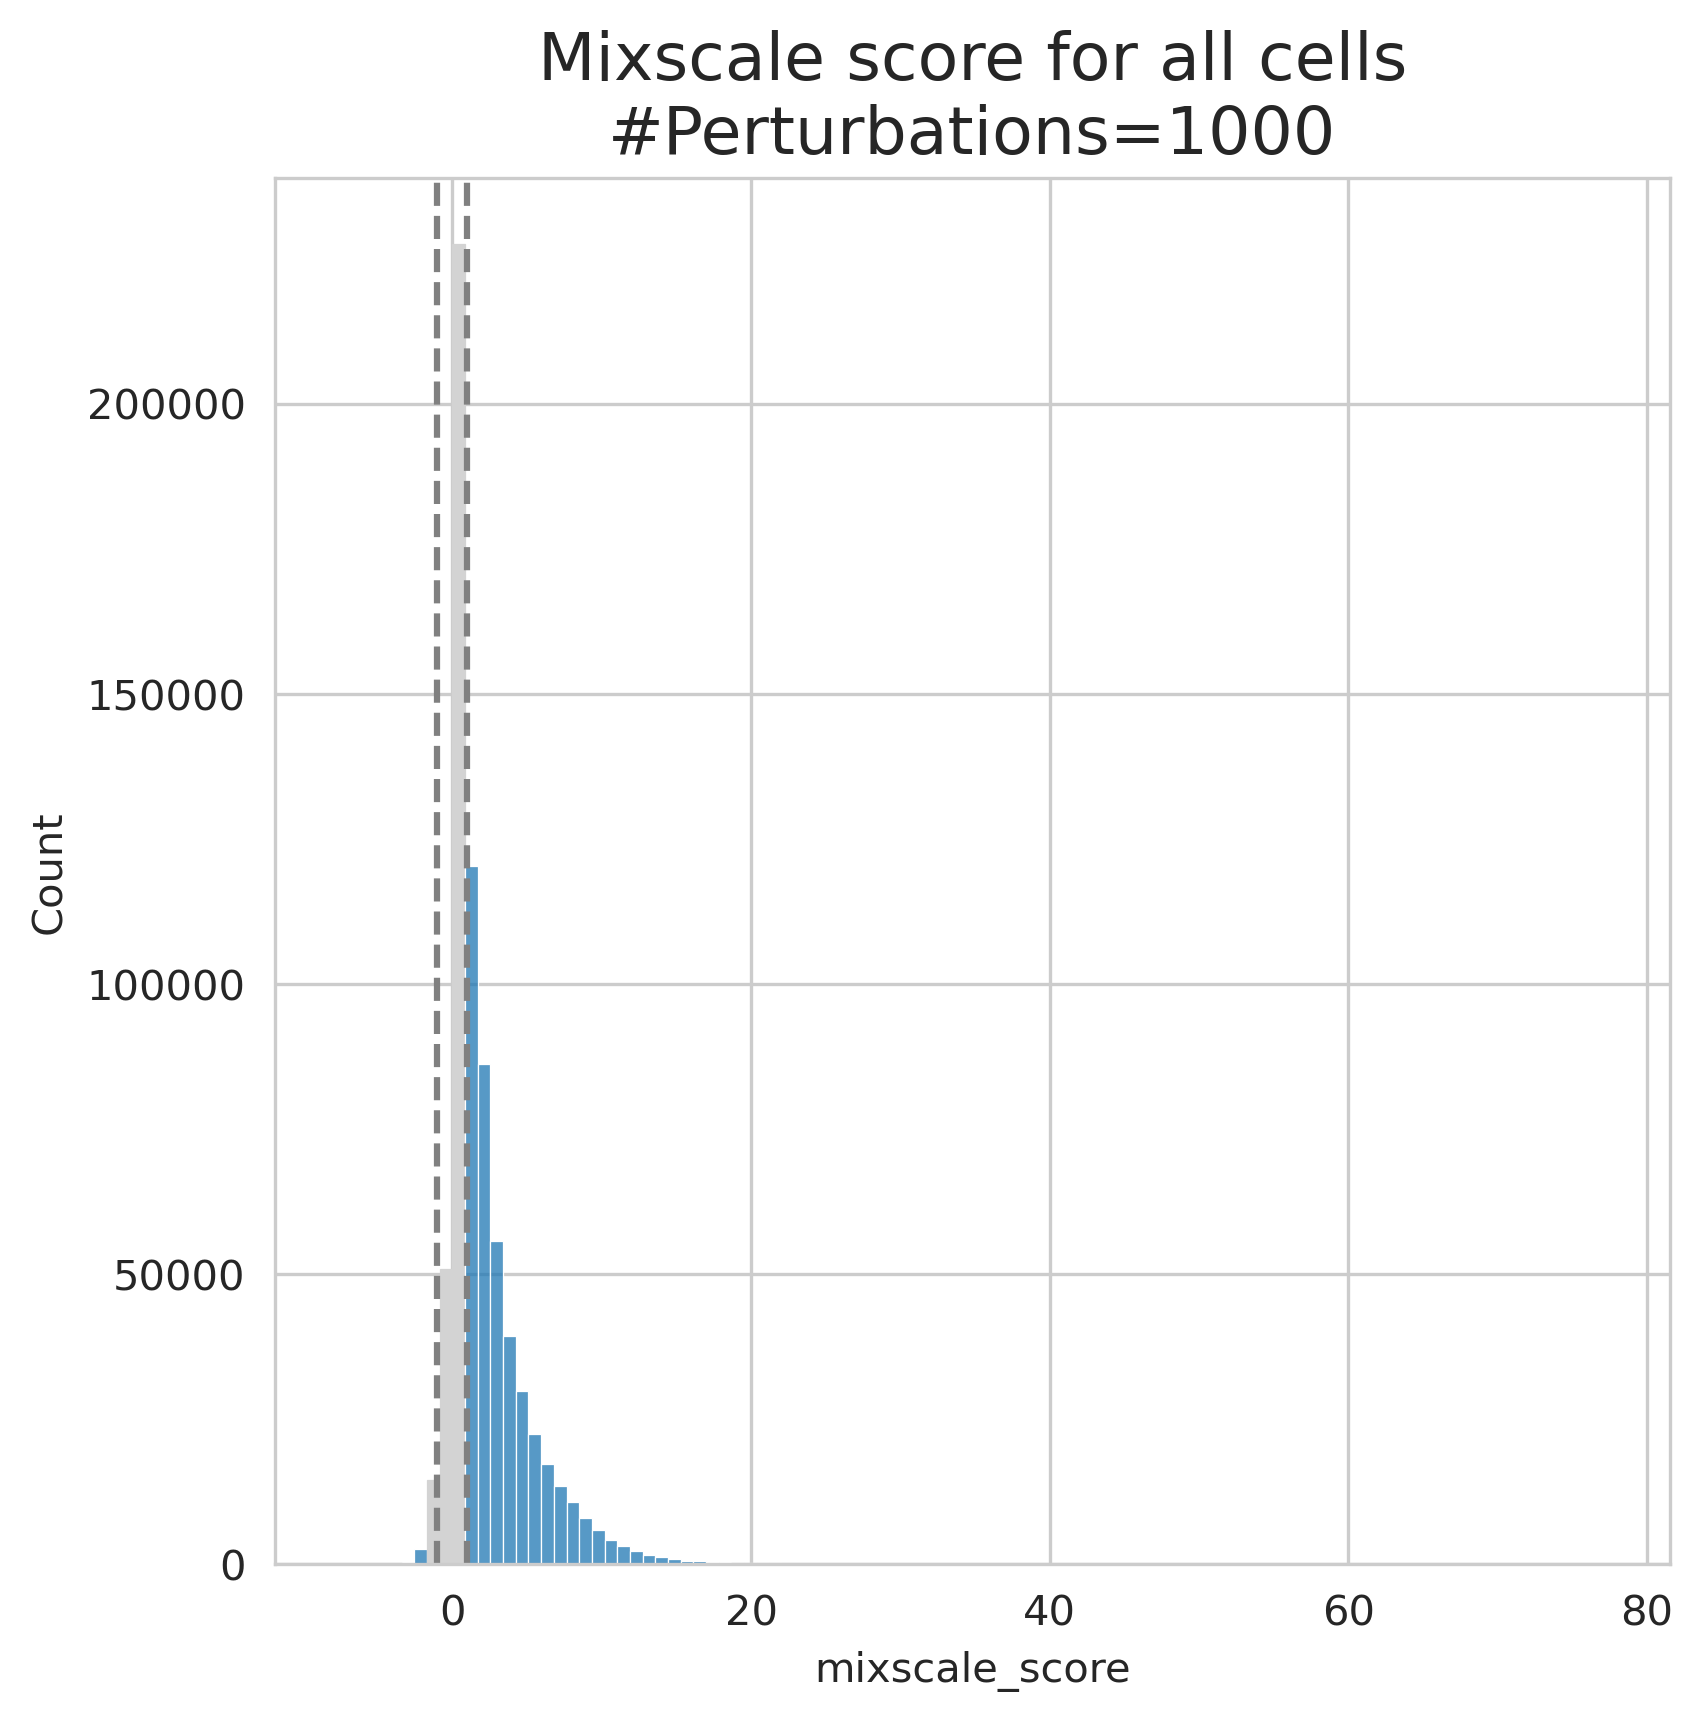

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(6,6), dpi=300)
ax = sns.histplot(meta[meta.perturbation!='control'].mixscale_score, bins=100)
# Loop over bars (patches) and recolor
for patch in ax.patches:
    # Get bar center (x) and width
    x = patch.get_x()
    width = patch.get_width()
    center = x + width / threshold
    
    # Color grey if center is between -2 and 2
    if -threshold <= center <= threshold:
        patch.set_color("lightgrey")
ax.axvline(-threshold, color='grey', linestyle='--')
ax.axvline(threshold, color='grey', linestyle='--')

plt.title('Mixscale score for all cells\n#Perturbations=1000', fontsize=16)
plt.show()

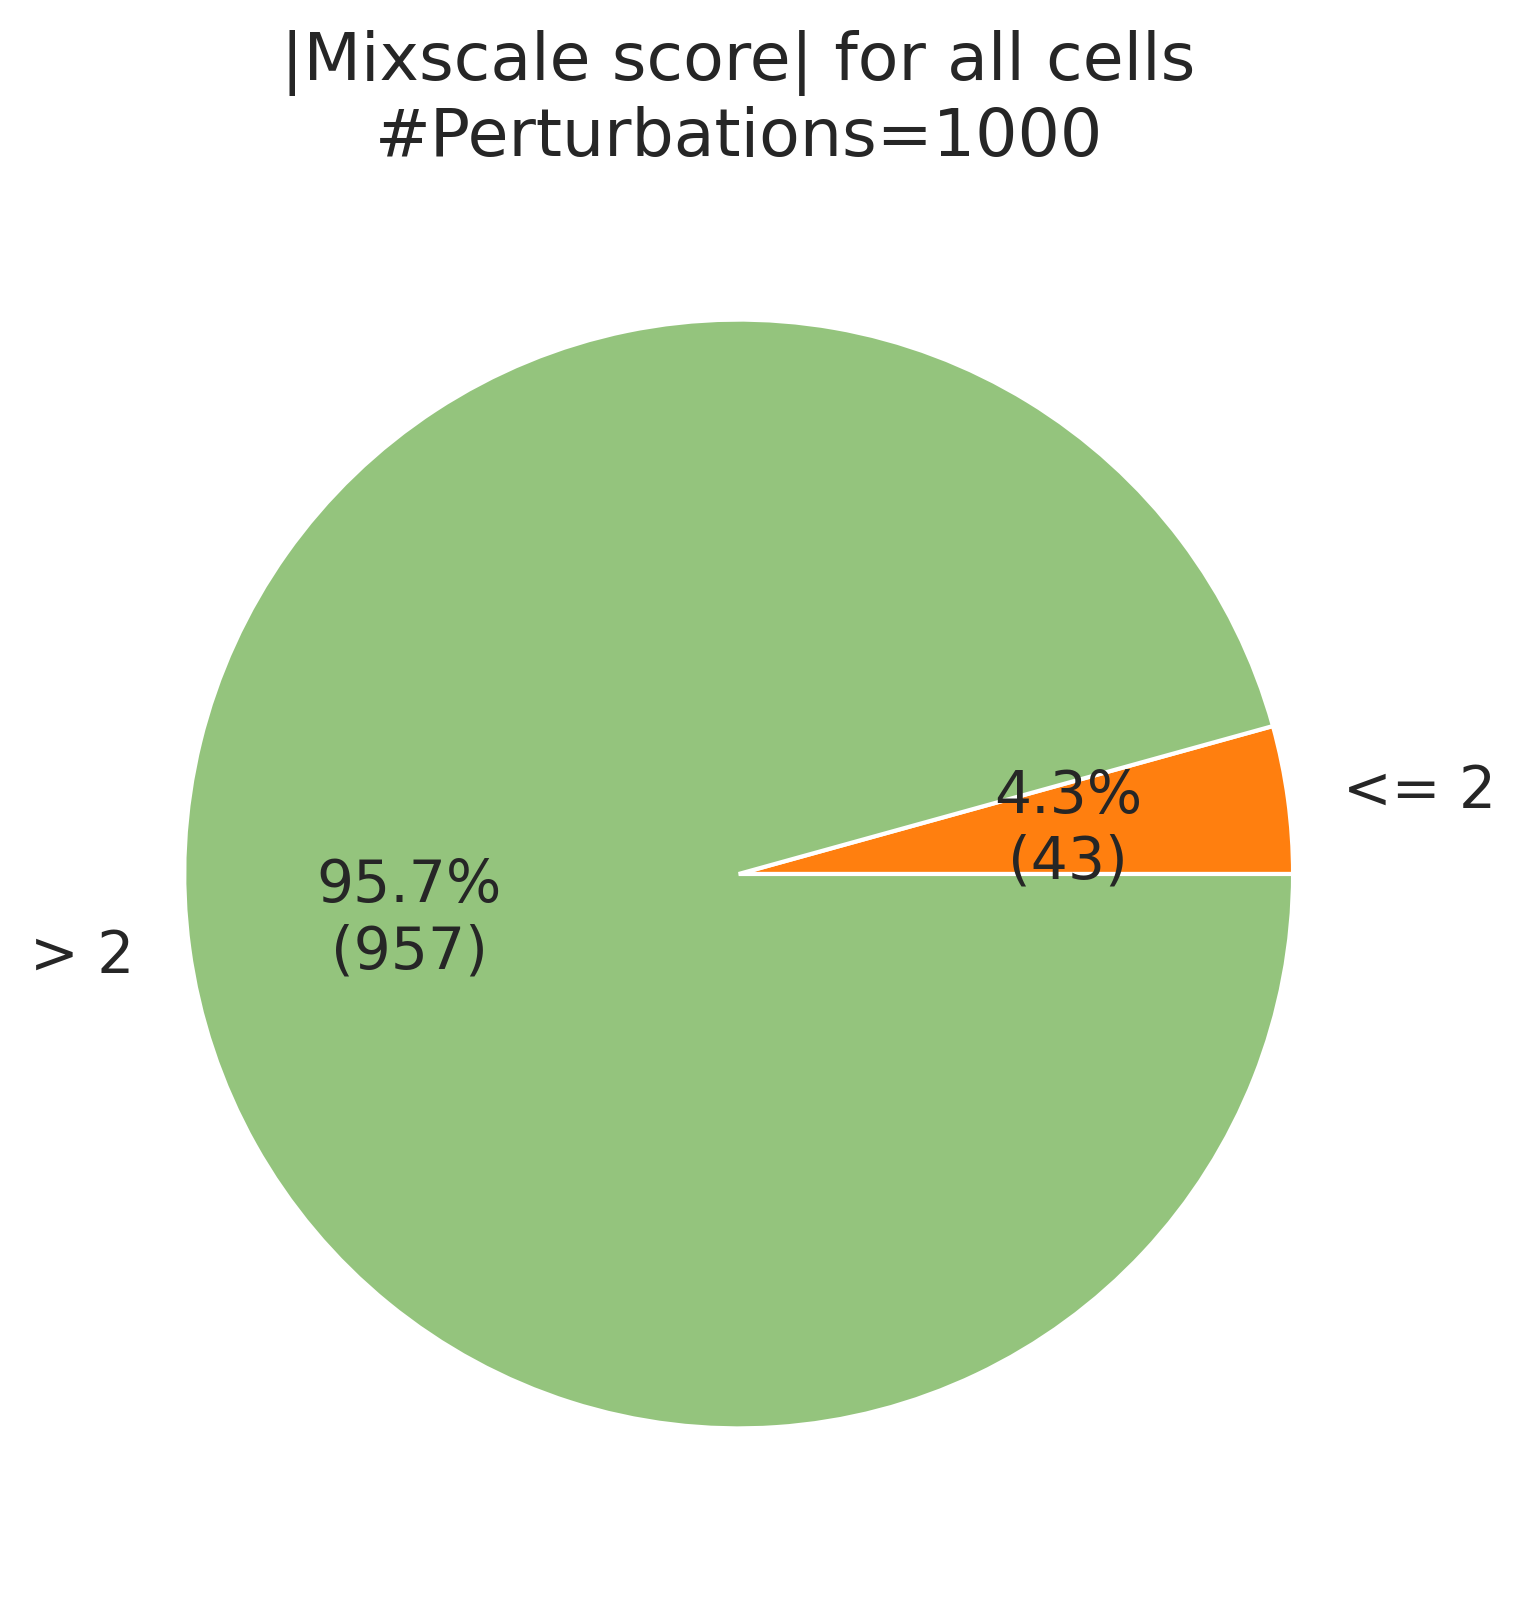

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot loss of perturbations
filtered_meta = meta[meta.mixscale_score.abs() > 2]
n_p_total = meta.perturbation.nunique()
n_p_af = filtered_meta.perturbation.nunique()
pl_d = [n_p_total-n_p_af, n_p_af]
pl_l = ['<= 2', '> 2']

sns.set_style("whitegrid")
def autopct_format(pct, all_vals):
    absolute = int(round(pct / 100 * sum(all_vals)))
    return f'{pct:.1f}%\n({absolute})'

plt.figure(figsize=(6, 6), dpi=300)
plt.pie(
    pl_d,
    labels=pl_l,
    autopct=lambda pct: autopct_format(pct, pl_d),
    colors=['#ff7f0f', '#94c47d'],
    textprops={'fontsize': 14}
)
plt.title('|Mixscale score| for all cells\n#Perturbations=1000', fontsize=16)
plt.show()

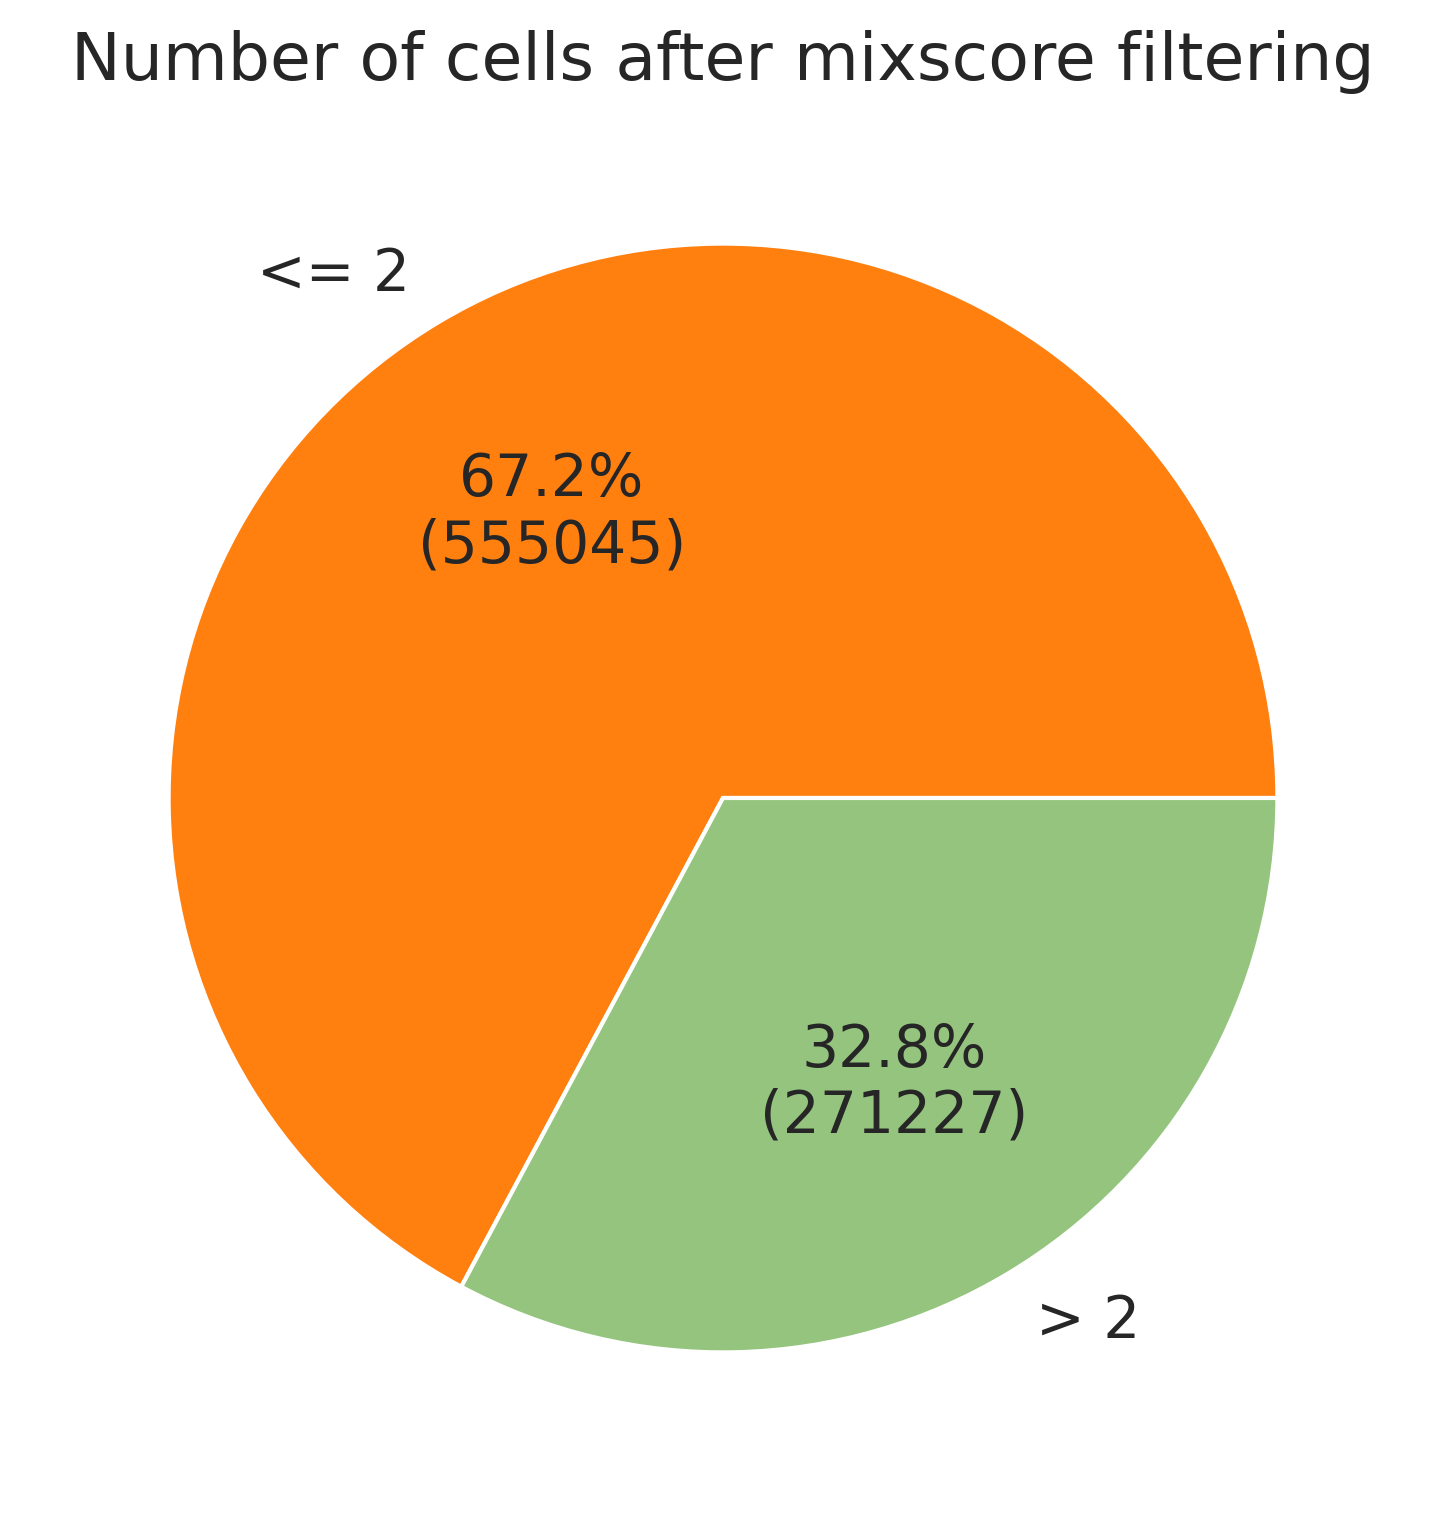

In [12]:
threshold = 2
filtered_meta = meta[meta.mixscale_score.abs() > threshold]
n_p_total = meta.shape[0]
n_p_af = filtered_meta.shape[0]
pl_d = [n_p_total-n_p_af, n_p_af]
pl_l = [f'<= {threshold}', f'> {threshold}']

sns.set_style("whitegrid")
def autopct_format(pct, all_vals):
    absolute = int(round(pct / 100 * sum(all_vals)))
    return f'{pct:.1f}%\n({absolute})'

plt.figure(figsize=(6, 6), dpi=300)
plt.pie(
    pl_d,
    labels=pl_l,
    autopct=lambda pct: autopct_format(pct, pl_d),
    colors=['#ff7f0f', '#94c47d'],
    textprops={'fontsize': 14}
)
plt.title('Number of cells after mixscore filtering', fontsize=16)
plt.show()

In [51]:
import anndata as ad

adatas = []
for f in os.listdir(data_dir):
    if f.endswith('.h5ad'):
        print(f'Adding {f} to meta-set')
        fa = os.path.join(base_dir, f)
        adata = sc.read(fa)
        adata.obs['dataset'] = f.split('.h5ad')[0]
        adatas.append(adata)
print('Combining data')
adatas = ad.concat(adatas)

Adding ReplogleWeissman2022_rpe1.h5ad to meta-set
Adding Mali_2024_processed.h5ad to meta-set
Adding ReplogleWeissman2022_K562_gwps.h5ad to meta-set
Adding ReplogleWeissman2022_K562_essential.h5ad to meta-set
Combining data


In [55]:
adatas.obs.dataset.value_counts()

dataset
ReplogleWeissman2022_K562_gwps         161247
ReplogleWeissman2022_rpe1               91676
ReplogleWeissman2022_K562_essential     85073
Mali_2024_processed                     45418
Name: count, dtype: int64

In [57]:
adatas = adatas[~adatas.obs.dataset.str.startswith('Mali')].copy()

In [59]:
# Filter by mixscale score
meta[~meta.dataset.str.startswith('Mali')]

,orig.ident,nCount_originalexp,nFeature_originalexp,cell_barcode,num_features,feature_call,num_umis,perturbation,cell_idx,is_ctrl,...,pct_counts_ribo,total_counts_hb,log1p_total_counts_hb,pct_counts_hb,outlier,mt_outlier,perturbation_type,exact_perturbation,mixscale_mask,mixscale_threshold
AAACCCAAGAACCCGA-228;ReplogleWeissman2022_K562_gwps,SeuratProject,23800,4530,NaN,NaN,NaN,NaN,XRCC2,NaN,False,...,25.672268,158.0,5.068904,0.663866,False,False,CRISPRi,XRCC2;lymphoblasts;CRISPRi,False,False
AAACCCAAGAACGCGT-60;ReplogleWeissman2022_K562_gwps,SeuratProject,11157,3175,NaN,NaN,NaN,NaN,ZNF100,NaN,False,...,25.221834,8.0,2.197225,0.071704,False,False,CRISPRi,ZNF100;lymphoblasts;CRISPRi,False,False
AAACCCAAGAACTTCC-247;ReplogleWeissman2022_K562_gwps,SeuratProject,6453,2292,NaN,NaN,NaN,NaN,NUP98,NaN,False,...,24.236790,27.0,3.332205,0.418410,False,False,CRISPRi,NUP98;lymphoblasts;CRISPRi,False,False
AAACCCAAGAAGCTCG-12;ReplogleWeissman2022_K562_gwps,SeuratProject,7842,2818,NaN,NaN,NaN,NaN,UPF2,NaN,False,...,21.129814,80.0,4.394449,1.020148,False,False,CRISPRi,UPF2;lymphoblasts;CRISPRi,True,True
AAACCCAAGAAGGGAT-125;ReplogleWeissman2022_K562_gwps,SeuratProject,12743,3424,NaN,NaN,NaN,NaN,CYS1,NaN,False,...,25.496351,2.0,1.098612,0.015695,False,False,CRISPRi,CYS1;lymphoblasts;CRISPRi,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGTCTCTCCGA-20;ReplogleWeissman2022_rpe1,SeuratProject,9495,3056,NaN,NaN,NaN,NaN,SIN3A,NaN,False,...,21.664034,2.0,1.098612,0.021064,False,False,CRISPRi,SIN3A;retinal pigment epithelial cells;CRISPRi,NaN,True
TTTGTTGTCTGATGGT-14;ReplogleWeissman2022_rpe1,SeuratProject,15154,4135,NaN,NaN,NaN,NaN,SLC1A5,NaN,False,...,20.093704,1.0,0.693147,0.006599,False,False,CRISPRi,SLC1A5;retinal pigment epithelial cells;CRISPRi,NaN,False
TTTGTTGTCTGCACCT-44;ReplogleWeissman2022_rpe1,SeuratProject,21798,4803,NaN,NaN,NaN,NaN,MAX,NaN,False,...,15.450959,4.0,1.609438,0.018350,False,False,CRISPRi,MAX;retinal pigment epithelial cells;CRISPRi,NaN,True
TTTGTTGTCTGTCCCA-37;ReplogleWeissman2022_rpe1,SeuratProject,7990,2810,NaN,NaN,NaN,NaN,MLST8,NaN,False,...,20.387985,2.0,1.098612,0.025031,False,False,CRISPRi,MLST8;retinal pigment epithelial cells;CRISPRi,NaN,True


In [14]:
import numpy as np
# Check ZIR
1 - (adatas.X.nnz / np.multiply(*adatas.X.shape))

0.5795559211611861

In [15]:
# Check how many perturbations got filtered out completely
adatas.obs.groupby('celltype')['perturbation'].nunique()

KeyError: 'celltype'

In [6]:
adatas.write_h5ad(os.path.join(base_dir, 'mixscale_filtered.h5ad'))